In [6]:
import pandas as pd
from Bio import Phylo
from io import StringIO

PATH = "/lustre/fs5/vgl/store/adenisova/Inno/upstreams/"

tree_df = pd.read_csv(f"{PATH}/common_tree.txt", sep = '\t', skiprows = 0, names = ["gene", "tree"])
tree_df["n_nodes"] = tree_df["tree"].apply(lambda x: len(Phylo.read(StringIO(x), "newick").get_terminals()))

tree_df["leaf_names"] = tree_df["tree"].apply(
    lambda x: [
        leaf.name for leaf in Phylo.read(StringIO(x), "newick").get_terminals()
    ]
)
tree_df["leaf_names"]

0       [GCF_900496995.4, GCA_018139145.1, GCF_0122752...
1       [GCA_008658365.1, GCA_009819605.1, GCA_0176394...
2       [GCA_009769465.1, GCF_900496995.4, GCA_0098195...
3       [GCA_014839835.1, GCA_015220805.1, GCA_0176392...
4       [GCA_018139145.1, GCF_900496995.4, GCA_0098198...
                              ...                        
2424    [GCF_003957565.2, GCA_902806625.1, GCA_0190231...
2425    [GCA_019023105.1, GCA_902806625.1, GCA_0098196...
2426    [GCA_009819655.1, GCA_014839755.1, GCF_0039575...
2427    [GCA_009764595.1, GCF_012460135.1, GCA_0190231...
2428    [GCA_009769465.1, GCA_018139145.1, GCA_0097696...
Name: leaf_names, Length: 2429, dtype: object

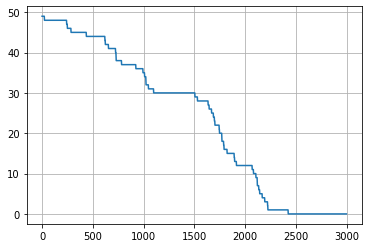

In [7]:
# Подбираем как оптимально обрезать количество видов

import matplotlib.pyplot as plt
from collections import defaultdict

# Смотрим сколько раз каждый вид присутствует деревьях
accesion_frequence = defaultdict(int)
for names in tree_df["leaf_names"]:
    for j in names:
        accesion_frequence[j] += 1 


def get_number_of_species_presented_in_genes(number_of_genes):
    n = 0
    for key in accesion_frequence:
        if accesion_frequence[key] > number_of_genes:
            n += 1
    return n

limit = 3000
number_of_species = []
for i in range(limit):
    number_of_species.append(get_number_of_species_presented_in_genes(i))

plt.plot([i for i in range(limit)], number_of_species)
plt.grid(True)

best_30 = set([i for i in accesion_frequence if accesion_frequence[i] > 1500])

In [8]:
# Смотрим в скольких деревьях все эти виды были встречены вместе

tree_df["leaf_names_set"] = tree_df["leaf_names"].apply(lambda x: set(x))
tree_df["leaf_names_set"].apply(lambda x: len(best_30 - x)).value_counts().head()

0     1080
1      232
2      132
3       75
24      61
Name: leaf_names_set, dtype: int64

In [9]:
cactus_birds = pd.read_csv(f'{PATH}/cactus_accesions_and_species.tsv', sep = "\t")
cactus_birds_best_30 = cactus_birds[cactus_birds['Accesion'].apply(lambda x: x in best_30)]

In [10]:
all_birds_db = pd.read_excel(
    f'{PATH}/ALLBIRDTRAITS_Database_August_2024_VGL_SPECIES.xlsx',
    sheet_name = "ALLBIRDTRAITS_Database_August_2",
).drop(0)
all_birds_db.head()

,Order,Family,Genus,Species,animal,BiogeographicRange,ResearchEffort,DietBreadth,HabitatBreadth,GenerationLength,...,Hand-Wing_index,Tail_length,Mass,Habitat,Habitat_density,Migration,Trophic_level,Trophic_niche,Primary_lifestyle,Range_size
1,CAPRIMULGIFORMES,TROCHILIDAE,Abeillia,Abeillia_abeillei,Abeillia_abeillei,several,0,2,1.674435,4.2,...,66.3,29.4,2.70,Forest,2.0,1.0,Herbivore,Nectarivore,Aerial,144610.40
2,GALLIFORMES,CRACIDAE,Aburria,Aburria_aburri,Aburria_aburri,South-America,7,1,1.870561,5.7,...,15.7,290.4,1405.08,Forest,1.0,1.0,Herbivore,Frugivore,Insessorial,139314.36
3,PASSERIFORMES,MELIPHAGIDAE,Acanthagenys,Acanthagenys_rufogularis,Acanthagenys_rufogularis,Australasia,12,4,3.522718,6.8,...,23.2,111.4,47.80,Shrubland,2.0,1.0,Omnivore,Omnivore,Insessorial,5976565.20
4,PASSERIFORMES,ACANTHISITTIDAE,Acanthisitta,Acanthisitta_chloris,Acanthisitta_chloris,Australasia,16,2,2.991904,3.5,...,13.9,23.5,6.91,Forest,1.0,1.0,Carnivore,Invertivore,Insessorial,152503.84
5,PASSERIFORMES,ACANTHIZIDAE,Acanthiza,Acanthiza_apicalis,Acanthiza_apicalis,Australasia,5,3,4.589201,5.7,...,14.2,44.1,7.62,Woodland,2.0,1.0,Carnivore,Invertivore,Insessorial,4124270.80


In [11]:
species_must_df = pd.read_csv(
    "common_species_with_innovation_rate.tsv",
    sep = "\t"
)
species_must_be_in_alignment_set = set(species_must_df["Accesion"].tolist())

In [12]:
'","'.join(species_must_be_in_alignment_set)

'GCA_009819595.1","GCA_020746105.1","GCF_017639655.2","GCF_000738735.5","GCA_009819655.1","GCF_900496995.4","GCA_015220805.1","GCF_015832195.1","GCF_009819885.2","GCA_014839755.1","GCF_012460135.1","GCF_015220075.1","GCA_903797595.2","GCA_019023105.1","GCF_009650955.1","GCA_009764595.1","GCA_016904835.1","GCA_009769605.1","GCA_017639245.1","GCA_009819825.1","GCA_018139145.1","GCF_009829145.1","GCF_004027225.2","GCA_013407035.1","GCF_003957565.2","GCF_015227805.1'

In [13]:
birds_with_inno = cactus_birds_best_30.merge(all_birds_db, how = "inner")
birds_with_inno.to_csv(
    f'{PATH}/common_species_with_innovation_rate.tsv',
    sep = "\t",
    index = False
)

In [14]:
### А теперь попробуем создать общее дерево, на основе которого мы будем ровнять все остальные

### Проверка на бинарность
from Bio import Phylo
from io import StringIO

def is_binary_tree(tree_clade):
    """Проверяет, является ли дерево бинарным."""
    # Пройдите по всем узлам (клэйдам) дерева
    for clade in tree_clade.find_clades():
        # Количество дочерних узлов не должно превышать 2
        if len(clade.clades) > 2:
            return False
    return True

def check_binary_tree(newick_string):
    # Создайте дерево из строкового представления Newick
    tree = Phylo.read(StringIO(newick_string), "newick")
    # Проверьте, является ли дерево бинарным
    return is_binary_tree(tree.root)


tree_from_file = open(f"{PATH}/shaohong_feng_truncated.tree", "r").read()
tree = Tree(tree_from_file)


tree.prune(birds_with_inno["Accesion"].tolist())
if check_binary_tree(tree.write(format = 1)):
    print(tree)
    cactus_file_to_save = open(f"{PATH}/shaohong_feng_for_most_common_species.tree", "w")
    cactus_file_to_save.write(tree.write())
    cactus_file_to_save.close()
else:
    print("You got non-binary tree")



                     /-GCF_009829145.1
                    |
                    |                     /-GCF_012460135.1
                    |                  /-|
                    |               /-|   \-GCA_009764595.1
                    |              |  |
                    |            /-|   \-GCA_019023105.1
                    |           |  |
                    |         /-|   \-GCF_015832195.1
                  /-|        |  |
                 |  |      /-|   \-GCF_003957565.2
                 |  |     |  |
                 |  |     |  |   /-GCA_903797595.2
                 |  |     |   \-|
                 |  |   /-|      \-GCF_009819885.2
                 |  |  |  |
                 |  |  |  |      /-GCA_009819655.1
                 |  |  |  |   /-|
               /-|  |  |   \-|   \-GCA_014839755.1
              |  |   \-|     |
              |  |     |      \-GCF_015227805.1
              |  |     |
              |  |     |      /-GCF_009650955.1
              |  | 

In [15]:
tree = Tree(tree_from_file)
print(tree)


                              /-GCA_009819605.1
                           /-|
                        /-|   \-GCA_008658365.1
                       |  |
                     /-|   \-GCA_017639485.1
                    |  |
                  /-|   \-GCA_009819775.1
                 |  |
                 |  |   /-GCA_020745775.1
                 |   \-|
                 |      \-GCA_017639555.1
                 |
                 |                     /-GCF_009829145.1
                 |                    |
                 |                    |                     /-GCF_012460135.1
                 |                    |                  /-|
                 |                    |                 |   \-GCA_009764595.1
                 |                    |               /-|
                 |                    |              |  |   /-GCA_019023105.1
                 |                    |            /-|   \-|
                 |                    |           |  |      \-GCA_90280

In [7]:
from ete3 import Tree
import pandas as pd

birds_with_inno = pd.read_csv(
    f'{PATH}/common_species_with_innovation_rate.tsv',
    sep = "\t",
)
birds_with_inno

shaohong_feng_for_most_common_species = open("shaohong_feng_for_most_common_species.tree", "r").read()

tree = Tree(shaohong_feng_for_most_common_species)

def rename_tree_to_sp_names(tree):
    for node in tree:
        node.name = birds_with_inno[birds_with_inno["Accesion"] == node.name]["Species"].item()
    return tree.write(format = 1)

new_tree = rename_tree_to_sp_names(tree)

f = open("shaohong_feng_for_most_common_species_format.tree", "w")
f.write(new_tree)
f.close()

tree = Tree(shaohong_feng_for_most_common_species)
f = open("shaohong_feng_for_most_common_species_unrooted.tree", "w")
tree.unroot()
f.write(tree.write())
f.close()

In [18]:
import pandas as pd
from ete3 import Tree

file = pd.read_csv("common_tree_with_26_sp.txt", sep = '\t', names = ["gene", "tree"])
file["tree_new_format"] = file["tree"].apply(lambda x: rename_tree_to_sp_names(Tree(x)))
file[["gene","tree_new_format"]].to_csv(
    "common_tree_with_26_sp_corrected.txt",
    sep = "\t",
    index = False,
    header = False
)

In [8]:
tree = Tree(shaohong_feng_for_most_common_species)
print(tree)




                     /-GCF_009829145.1
                    |
                    |                     /-GCF_012460135.1
                    |                  /-|
                    |               /-|   \-GCA_009764595.1
                    |              |  |
                    |            /-|   \-GCA_019023105.1
                    |           |  |
                    |         /-|   \-GCF_015832195.1
                  /-|        |  |
                 |  |      /-|   \-GCF_003957565.2
                 |  |     |  |
                 |  |     |  |   /-GCA_903797595.2
                 |  |     |   \-|
                 |  |   /-|      \-GCF_009819885.2
                 |  |  |  |
                 |  |  |  |      /-GCA_009819655.1
                 |  |  |  |   /-|
               /-|  |  |   \-|   \-GCA_014839755.1
              |  |   \-|     |
              |  |     |      \-GCF_015227805.1
              |  |     |
              |  |     |      /-GCF_009650955.1
              |  | 

In [41]:
tree.unroot()
tree.write()

'((Aquila_chrysaetos:3.26717,Gymnogyps_californianus:4.82934)1:6.01802,(((((Chiroxiphia_lanceolata:0.878086,(((((((Molothrus_ater:0.486043,Geothlypis_trichas:0.108256)1:0.736053,Diglossa_brunneiventris:0.0832733)1:1.77492,Motacilla_alba:2.27579)1:1.51308,Taeniopygia_guttata:3.2109)1:3.51866,(Erithacus_rubecula:11.6994,Catharus_ustulatus:5.93573)1:1.51479)1:0.41469,((Sylvia_atricapilla:8.37127,Sylvia_borin:6.65072)1:0.0941115,Hirundo_rustica:1.17428)1:0.859114)1:1.01766,((Corvus_moneduloides:2.12917,Corvus_corone:1.70375)1:0.667748,Corvus_monedula:1.00849)1:2.18768)1:0.0766051)1:2.86578,Acanthisitta_chloris:33.134)1:6.5572,(Strigops_habroptila:27.7964,Myiopsitta_monachus:5.62576)1:23.4722)1:2.52475,(Falco_rusticolus:0.77137,Falco_naumanni:7.77077)1:7.69353)1:1.57332,Cariama_cristata:7.56947)1:1.65553,(((Merops_nubicus:5.54984,Pogoniulus_pusillus:1.8531)1:1.31886,Bucorvus_abyssinicus:3.8266)1:1.11408,Trogon_surrucura:3.21673)1:0.979261);'

In [1]:
from ete3 import Tree
print(Tree("(((((((GCF_009829145.1:0.09912785826351243335,(((((((GCF_012460135.1:0.03036296472528302037,GCA_009764595.1:0.03695839347435789929):0.00473504786385781865,GCA_019023105.1:0.03422450782464248747):0.01013006016997136313,GCF_015832195.1:0.03913663010613577242):0.00680909084953667219,GCF_003957565.2:0.05082663123465661764):0.01477953379823775809,(GCA_903797595.2:0.05684244422926421764,GCF_009819885.2:0.04234260382570451120):0.01870426296999853216):0.00176806601562625831,((GCA_009819655.1:0.02158714857206975660,GCA_014839755.1:0.01905537233470180544):0.03324041558722402173,GCF_015227805.1:0.06164427995954512712):0.00757947048018425655):0.01495520414387252993,((GCF_009650955.1:0.00525595239647857777,GCF_000738735.5:0.00283499075520015319):0.00587998884645874950,GCA_013407035.1:0.01133176920313113539):0.05514846528861585412):0.06970706180805097407):0.01890617377594104587,GCA_016904835.1:0.12443488532327567908):0.04795307993087280507,(GCF_004027225.2:0.04855047944063763804,GCA_017639245.1:0.07122300178691957917):0.05500862090606731258):0.00206274319903500692,(GCF_015220075.1:0.00719195028500725034,GCF_017639655.2:0.00964395265649639795):0.07848146602810626704):0.00123855057327330615,GCA_009819825.1:0.06980507993668677580):0.00133765898838672710,(((GCA_009819595.1:0.10473346718820195078,GCA_015220805.1:0.25700868139725008277):0.01385090255930513693,GCA_009769605.1:0.11160432688678796620):0.00254290944948559533,GCA_020746105.1:0.15608195279025655067):0.00374401022076777199):0.00099866031969324124,(GCF_900496995.4:0.04910974446941483024,GCA_018139145.1:0.04883408207463900419):0.00099866031969324124);"))


                     /-GCF_009829145.1
                    |
                    |                     /-GCF_012460135.1
                    |                  /-|
                    |               /-|   \-GCA_009764595.1
                    |              |  |
                    |            /-|   \-GCA_019023105.1
                    |           |  |
                    |         /-|   \-GCF_015832195.1
                  /-|        |  |
                 |  |      /-|   \-GCF_003957565.2
                 |  |     |  |
                 |  |     |  |   /-GCA_903797595.2
                 |  |     |   \-|
                 |  |   /-|      \-GCF_009819885.2
                 |  |  |  |
                 |  |  |  |      /-GCA_009819655.1
                 |  |  |  |   /-|
               /-|  |  |   \-|   \-GCA_014839755.1
              |  |   \-|     |
              |  |     |      \-GCF_015227805.1
              |  |     |
              |  |     |      /-GCF_009650955.1
              |  | 

In [24]:
print(Tree(file["tree_new_format"][1]))


   /-Diglossa_brunneiventris
  |
  |   /-Molothrus_ater
  |--|
  |   \-Geothlypis_trichas
--|
  |   /-Motacilla_alba
  |  |
  |  |   /-Taeniopygia_guttata
  |  |  |
  |  |  |      /-Erithacus_rubecula
   \-|  |   /-|
     |  |  |   \-Catharus_ustulatus
     |  |  |
     |  |  |            /-Corvus_corone
     |  |  |         /-|
      \-|  |      /-|   \-Corvus_moneduloides
        |  |     |  |
        |  |     |   \-Corvus_monedula
        |  |     |
        |  |     |         /-Pogoniulus_pusillus
        |  |     |        |
        |  |     |        |            /-Gymnogyps_californianus
        |  |     |        |         /-|
         \-|     |        |        |   \-Aquila_chrysaetos
           |     |        |        |
           |     |        |      /-|      /-Bucorvus_abyssinicus
           |   /-|      /-|     |  |   /-|
           |  |  |     |  |     |  |  |  |   /-Merops_nubicus
           |  |  |     |  |     |  |  |   \-|
           |  |  |     |  |     |   \-|     |   

In [26]:
file["tree_new_format"] = file["tree"].apply(lambda x: Tree(x).write(format=1))
file[["gene","tree_new_format"]].to_csv(
    "common_tree_with_26_sp_corrected.txt",
    sep = "\t",
    index = False,
    header = False
)

In [25]:
file["tree"][0]

'(GCF_015220075.1:0.0072171957,GCF_017639655.2:0.0094950592,(((GCF_900496995.4:0.0461618449,GCA_009769605.1:0.1125833893)1:0.0030716763,(GCA_017639245.1:0.0709778909,GCF_004027225.2:0.0481280271)1:0.0558184382)1:0.0014117422,(((GCA_009819595.1:0.1208758205,(GCA_020746105.1:0.1530135352,(GCA_015220805.1:0.2523903497,(((((((((GCA_009764595.1:0.0370146321,GCF_012460135.1:0.0303176722)1:0.0047356911,GCA_019023105.1:0.0342282330)1:0.0101494256,GCF_015832195.1:0.0392197666)1:0.0068063488,GCF_003957565.2:0.0509948110)1:0.0147033035,(GCA_903797595.2:0.0569467696,GCF_009819885.2:0.0425099854)1:0.0186784904)1:0.0017422075,((GCA_009819655.1:0.0215542032,GCA_014839755.1:0.0191344687)1:0.0333232233,GCF_015227805.1:0.0616970866)1:0.0075799849)1:0.0149253706,((GCF_000738735.5:0.0028293077,GCF_009650955.1:0.0052781268)1:0.0059004956,GCA_013407035.1:0.0113363899)1:0.0552634814)1:0.0693893087,GCF_009829145.1:0.1000545278)1:0.0187928136,GCA_016904835.1:0.1243912876)1:0.0319416182)1:0.0130598487)1:0.00352

In [ ]:
tree = Tree(file["tree"][0])
tree.write(format=1)

opne

'(GCF_015220075.1:0.0072172,GCF_017639655.2:0.00949506,(((GCF_900496995.4:0.0461618,GCA_009769605.1:0.112583):0.00307168,(GCA_017639245.1:0.0709779,GCF_004027225.2:0.048128):0.0558184):0.00141174,(((GCA_009819595.1:0.120876,(GCA_020746105.1:0.153014,(GCA_015220805.1:0.25239,(((((((((GCA_009764595.1:0.0370146,GCF_012460135.1:0.0303177):0.00473569,GCA_019023105.1:0.0342282):0.0101494,GCF_015832195.1:0.0392198):0.00680635,GCF_003957565.2:0.0509948):0.0147033,(GCA_903797595.2:0.0569468,GCF_009819885.2:0.04251):0.0186785):0.00174221,((GCA_009819655.1:0.0215542,GCA_014839755.1:0.0191345):0.0333232,GCF_015227805.1:0.0616971):0.00757998):0.0149254,((GCF_000738735.5:0.00282931,GCF_009650955.1:0.00527813):0.0059005,GCA_013407035.1:0.0113364):0.0552635):0.0693893,GCF_009829145.1:0.100055):0.0187928,GCA_016904835.1:0.124391):0.0319416):0.0130598):0.00352124):0.00117856,GCA_018139145.1:0.048509):0.00199366,GCA_009819825.1:0.0688747):0.00195435):0.0784908);'

In [12]:
r_tree = "(hg19:0.002115,((macFas5:0.003687,chlSab1:0.008715):0.019764,(calJac3:0.082845,(otoGar3:0.218002,(tupChi1:0.197845,((ochPri3:0.207483,((hetGla2:0.092862,(cavPor3:0.103814,(chiLan1:0.035964,octDeg1:0.091531):0.016447):0.005965):0.095442,(speTri2:0.128193,(jacJac1:0.132642,((mm10:0.050651,rn5:0.053432):0.055646,(micOch1:0.057137,(criGri1:0.038600,mesAur1:0.044033):0.047006):0.039735):0.135745):0.033675):0.022570):0.024460):0.010722,(((((pteVam1:0.110839,eptFus1:0.104510):0.011035,(cerSim1:0.079280,(canFam3:0.072045,odoRosDi:0.043217):0.036714):0.002975):0.004780,(susScr3:0.065960,((turTru2:0.002823,orcOrc1:0.000004):0.031813,(panHod1:0.028527,(bosTau7:0.016778,oviAri3:0.007261):0.000004):0.076313):0.002416):0.040271):0.004881,(eriEur2:0.228082,sorAra2:0.159301):0.026691):0.008748,((monDom5:0.110834,sarHar1:0.130227):0.579124,(dasNov3:0.150335,(oryAfe1:0.130643,(chrAsi1:0.125316,(triMan1:0.061839,(loxAfr3:0.071030,eleEdw1:0.184502):0.002302):0.020740):0.008752):0.054024):0.012585):0.028278):0.014536):0.024262):0.028824):0.051976):0.004093):0.014408);"

In [ ]:
Tree(r_tree)

Tree node '' (0x7fa3edfeca9)